Explanation:Goal of this project is to predict if a person is diabetic or not,by looking some values.And finding the correlations.

Method:Implementing a classification algorithm on the dataset.

Used Algorithms:KNeighbors Classifier

Libraries:pandas,numpy,sklearn,matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
diabet=pd.read_csv(r"FILE PATH => diabetes.csv")
diabet.head(3) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [2]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
diabet.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_df=diabet.drop(columns="Outcome")
y_df=diabet["Outcome"]

X=np.array(X_df)
y=np.array(y_df)

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=43)

sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [76]:
knn=KNeighborsClassifier(n_neighbors=29)
model=knn.fit(X_train_sc,y_train)
knn.score(X_test_sc,y_test)

0.7922077922077922

In [77]:
model.predict([[3,135,66,40,1,29.8,0.57,45]])

array([1])

In [78]:
diabet.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


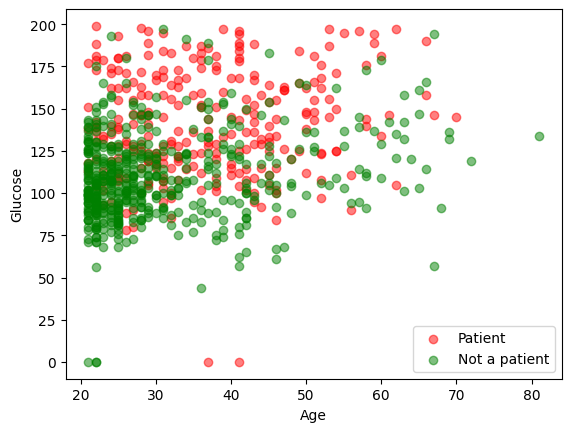

In [90]:
patient=diabet[diabet["Outcome"]==1]
not_patient=diabet[diabet["Outcome"]==0]

plt.scatter(patient["Age"],patient["Glucose"],color="red",label="Patient",alpha=0.5)
plt.scatter(not_patient["Age"],not_patient["Glucose"],color="green",label="Not a patient",alpha=0.5)

plt.legend()
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.show()